<a href="https://colab.research.google.com/github/gabie0208/eee4178-deep-learning/blob/main/1117_cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Look inside CNN**

MNIST

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [2]:
# Define Hyper-parameters and pre-set device on cuda

# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Adjust Dataset classes and channels
num_classes = 10
in_channel = 1

# Hyper-parameters
batch_size = 50
max_pool_kernel = 2
learning_rate = 0.0001
num_epochs = 5

In [3]:
# Load Data

train_data = torchvision.datasets.MNIST(root='./datasets',
                                        train=True,
                                        transform=transforms.ToTensor(),
                                        download=True)

test_data = torchvision.datasets.MNIST(root='./dataset',
                                       train=False,
                                       transform=transforms.ToTensor(),
                                       download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/train-images-idx3-ubyte.gz to ./dataset/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/train-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to ./dataset/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./dataset/MNIST/raw



In [4]:
# Define Dataloader

train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=batch_size,
                                          shuffle=False) 

In [5]:
# Define Model

class ConvNetStep(nn.Module):
  def __init__(self, num_classes=10):
    super(ConvNetStep, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=in_channel, out_channels=16, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(num_features=16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=max_pool_kernel)
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(num_features=32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=max_pool_kernel)
    )
    self.fc1 = nn.Linear(in_features=7*7*32, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=num_classes)

  def forward1(self, x):
    x = self.layer1(x)
    return x
  
  def forward2(self, x):
    x = self.layer2(x)
    return x

  def forward3(self, x):
    x = x.reshape(x.size(0),-1)
    return self.fc1(x)

  def forward4(self, x):
    return self.fc2(x)

  def forward(self, x):    # 실제 학습 시에는 이 함수만 사용
    x = self.layer1(x)
    x = self.layer2(x)
    
    x = F.relu(x)
    x = F.softmax(self.fc2(x))
    return x



model = ConvNetStep()

Text(0.5, 1.0, 'tensor(5)')

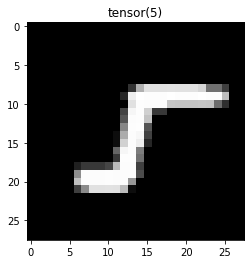

In [6]:
# Row Image (MNIST)

def image_show(tensor_image):
  image = tensor_image.reshape(tensor_image.size()[1], tensor_image.size()[2])    # width x height
  imshow(image, cmap='gray')

images, labels = next(iter(train_loader))
image1, label1 = images[0], labels[0]
image2, label2 = images[1], labels[1]

image_show(image1)
plt.title(label1)

Text(0.5, 1.0, 'tensor(5)')

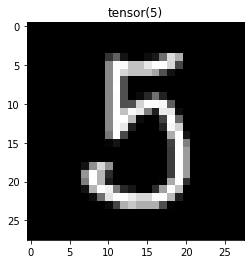

In [7]:
image_show(image2)
plt.title(label2)

In [8]:
# After 1st convolution layer

output1 = model.forward1(images)
print(output1.size())

torch.Size([50, 16, 14, 14])


In [9]:
image1, image2 = output1[0], output1[1]
print(image1.size(), image2.size())

torch.Size([16, 14, 14]) torch.Size([16, 14, 14])


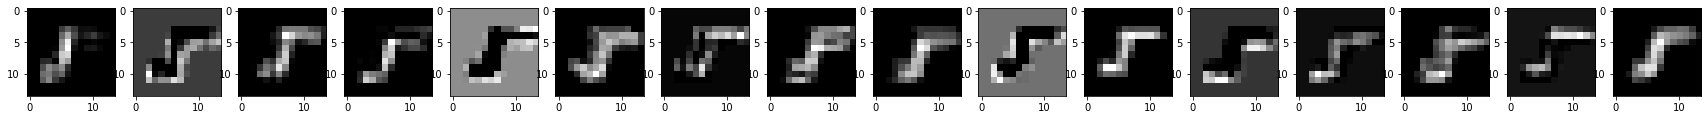

In [10]:
fig = plt.figure(figsize=(30,30))

for i in range(len(image1)):
  plt.subplot(1,len(image1),i+1)
  plt.imshow(image1[i].detach().numpy(), cmap='gray')

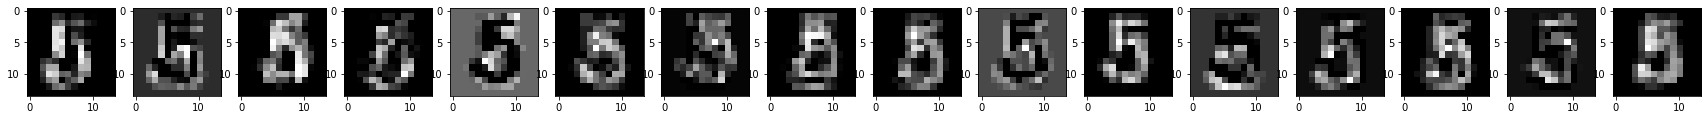

In [11]:
fig = plt.figure(figsize=(30,30))

for i in range(len(image2)):
  plt.subplot(1,len(image2),i+1)
  plt.imshow(image2[i].detach().numpy(), cmap='gray')

In [12]:
# After 2nd convolution layer

output2 = model.forward2(output1)
print(output2.size())

torch.Size([50, 32, 7, 7])


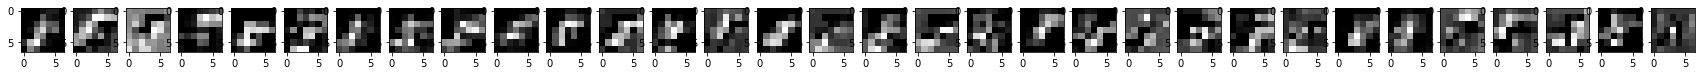

In [13]:
image1, image2 = output2[0], output2[1]

fig = plt.figure(figsize=(30,30))

for i in range(len(image1)):
  plt.subplot(1,len(image1),i+1)
  plt.imshow(image1[i].detach().numpy(), cmap='gray')

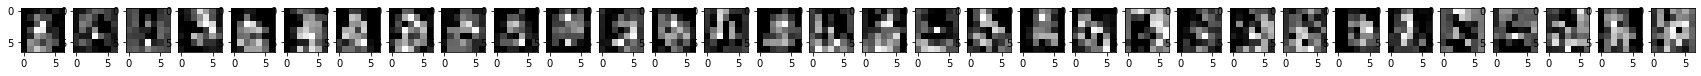

In [14]:
fig = plt.figure(figsize=(30,30))

for i in range(len(image2)):
  plt.subplot(1,len(image2),i+1)
  plt.imshow(image2[i].detach().numpy(), cmap='gray')

In [15]:
# After 3rd Fully Connected Layer

output3 = model.forward3(output2)
print(output3.size())

torch.Size([50, 120])


In [16]:
image1, image2 = output3[0], output3[1]

print(image1.size(), image2.size())

torch.Size([120]) torch.Size([120])


In [17]:
"""
  error : image1가 더 이상 2차원 tensor가 아님. (이미지로 show 불가)
"""
##imshow(image1[0].detach().numpy())

'\n  error : image1가 더 이상 2차원 tensor가 아님. (이미지로 show 불가)\n'

In [18]:
print(image1)

tensor([-0.6232, -0.6447, -0.4965, -0.4642, -0.5997, -0.4860, -0.5795, -0.7610,
        -0.0826,  0.0040,  1.2054,  0.6649,  1.0736, -0.5389, -0.4901,  1.2223,
        -1.1954,  0.3837, -0.2266, -0.0769, -0.4436,  0.1889, -0.5154, -0.0466,
        -0.0102, -0.1009,  0.1607, -0.1213,  0.1428, -0.2192, -0.4529,  1.2625,
         0.5642,  0.1393,  0.3798,  0.2102, -0.1145,  0.1141,  0.6063,  0.1513,
         0.6195,  0.6266,  0.3657, -0.3471, -0.2930, -0.2551,  0.3536, -0.3407,
        -0.9863, -0.5706, -0.2450, -0.8320,  0.1632, -0.6599, -0.7444, -0.2331,
        -0.8629,  0.1924, -0.7144, -0.1939,  0.5546,  0.3064,  0.8319,  0.0537,
         0.0385,  0.5576,  0.4731,  0.1422, -0.8285,  1.0322, -0.0801,  0.0899,
        -0.0085,  0.3462,  0.8545, -0.5928, -0.6214,  0.3366, -0.2084, -0.4114,
        -0.6837, -0.1406, -0.0360, -0.5728, -0.1671,  0.8824,  0.5492,  0.7283,
        -0.2680, -0.1115, -0.6983,  0.4749, -0.4868,  0.3244, -0.7060, -0.0919,
        -1.1592, -0.2109, -0.6266, -0.02

In [19]:
# After 4th Fully Connectec Layer

output4 = model.forward4(output3)
print(output4.shape)

torch.Size([50, 10])


In [20]:
image1, image2 = output4[0], output4[1]
print(image1.size())
print(image2.size())

torch.Size([10])
torch.Size([10])


In [21]:
print("image1")
print("the final tensor :", image1)
print("the result:", image1.tolist().index(image1.max()))

image1
the final tensor : tensor([-0.4000, -0.4028,  0.3975, -0.3000,  0.7687, -0.2273,  0.0019, -1.2183,
         0.1064, -0.3379], grad_fn=<SelectBackward0>)
the result: 4


In [22]:
print("image2")
print("the final tensor:", image2)
print("the result:", image2.tolist().index(image2.max()))

image2
the final tensor: tensor([-0.3977, -0.2696, -0.1017, -0.6651,  0.7032, -0.2503, -0.0749, -0.6522,
         0.1231, -0.2834], grad_fn=<SelectBackward0>)
the result: 4


In [23]:
# Set Loss & Optimizer

model = ConvNetStep().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [24]:
# Train

total_step = len(train_loader)

for epoch in range(num_epochs):
  for i, (img, label) in enumerate(train_loader):
    # Assign Tensors to Configures Devices (gpu)
    img = img.to(device)
    label = label.to(device)

    # Forward propagation
    outputs = model(img)

    # Get Loss, Compute Gradient, Update Parameters
    loss = criterion(outputs, label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print Loss
    if i % 10000 == 0 or (i+1)==len(train_loader):
      print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

RuntimeError: ignored

In [26]:
torch.save(model.state_dict(),"my_model.pth")   # model의 weight 정보 만을

In [27]:
test_model = ConvNetStep().to(device)

test_model.load_state_dict(torch.load("my_model.pth"))   # test_model이라는 모델 안에 앞서 학습한 weight 정보가 담기게 된다.

<All keys matched successfully>

In [28]:
test_model.eval()

with torch.no_grad():
  correct = 0
  
  for img, lab in test_loader:
    img = img.to(device)
    lab = lab.to(device)
    out = test_model(img)
    _, pred = torch.max(out.data, 1)
    correct += (pred == lab).sum().item()

  print("Accuracy of the network on the {} test images: {}%".format(len(test_loader)*batch_size, 100 * correct / (len(test_loader) * batch_size)))

RuntimeError: ignored